In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
#First Expantion

# Load the existing dataset from CSV
data = pd.read_csv('data2.csv') 

# Scaling
scaling_factor = 1.2
data['Temperature_scl'] = data['Temperature'] * scaling_factor
data['Humidity_scaled'] = data['Humidity'] * scaling_factor
data['Area_scaled'] = data['Area'] * scaling_factor
data['CS_scaled'] = data['CS'] * scaling_factor
data['O2_scaled'] = data['O2'] * scaling_factor

# Random Perturbations
noise_factor = 0.05
data['Temperature_perturbed'] = data['Area'] + np.random.normal(0, noise_factor, len(data))
data['Humidity_perturbed'] = data['Humidity'] + np.random.normal(0, noise_factor, len(data))
data['Area_perturbed'] = data['Area'] + np.random.normal(0, noise_factor, len(data))
data['CS_perturbed'] = data['CS'] + np.random.normal(0, noise_factor, len(data))
data['O2_perturbed'] = data['O2'] + np.random.normal(0, noise_factor, len(data))

# Synthetic Data Generation
synthetic_samples = 3
expanded_data = data.copy()
for _ in range(synthetic_samples):
    synthetic_data = pd.DataFrame({
        'Name': ['Synthetic'] * len(data),
        'Temperature': np.random.choice(data['Temperature'], len(data)),
        'Humidity': np.random.choice(data['Humidity'], len(data)),
        'Area': np.random.choice(data['Area'], len(data)),
        'CS': np.random.choice(data['CS'], len(data)),
        'O2': np.random.choice(data['O2'], len(data))
    })
    expanded_data = pd.concat([expanded_data, synthetic_data], ignore_index=True)

# Save the expanded dataset to CSV
expanded_data.to_csv('expanded_dataset.csv', index=False)  


In [19]:
#Second Expantion
# Load the existing dataset from CSV
data = pd.read_csv('expanded_dataset.csv') 

# Scaling
scaling_factor = 1.3
data['Temperature_scl'] = data['Temperature'] * scaling_factor
data['Humidity_scaled'] = data['Humidity'] * scaling_factor
data['Area_scaled'] = data['Area'] * scaling_factor
data['CS_scaled'] = data['CS'] * scaling_factor
data['O2_scaled'] = data['O2'] * scaling_factor

# Random Perturbations
noise_factor = 0.06
data['Temperature_perturbed'] = data['Area'] + np.random.normal(0, noise_factor, len(data))
data['Humidity_perturbed'] = data['Humidity'] + np.random.normal(0, noise_factor, len(data))
data['Area_perturbed'] = data['Area'] + np.random.normal(0, noise_factor, len(data))
data['CS_perturbed'] = data['CS'] + np.random.normal(0, noise_factor, len(data))
data['O2_perturbed'] = data['O2'] + np.random.normal(0, noise_factor, len(data))

# Synthetic Data Generation
synthetic_samples = 3
expanded_data = data.copy()
for _ in range(synthetic_samples):
    synthetic_data = pd.DataFrame({
        'Name': ['Synthetic'] * len(data),
        'Temperature': np.random.choice(data['Temperature'], len(data)),
        'Humidity': np.random.choice(data['Humidity'], len(data)),
        'Area': np.random.choice(data['Area'], len(data)),
        'CS': np.random.choice(data['CS'], len(data)),
        'O2': np.random.choice(data['O2'], len(data))
    })
    expanded_data = pd.concat([expanded_data, synthetic_data], ignore_index=True)

# Save the expanded dataset to CSV
expanded_data.to_csv('expanded_dataset2.csv', index=False)  


In [22]:
df = pd.read_csv("expanded_dataset2.csv")

# Split the data into input features (X) and target variable (y)
X = df[["Area","Temperature","Humidity","CS"]]  
y = df["O2"] 

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

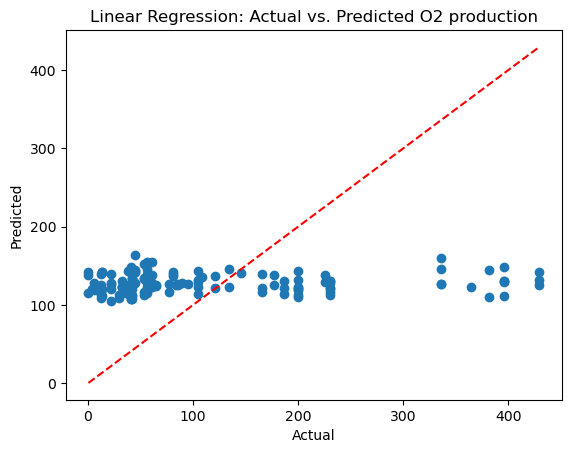

Mean Squared Error: 13314.768444914944
R-squared: -0.0033636659308431405


In [23]:
# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Plot the results
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression: Actual vs. Predicted O2 production')
plt.show()

print("Mean Squared Error:", mse)
print("R-squared:", r2)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


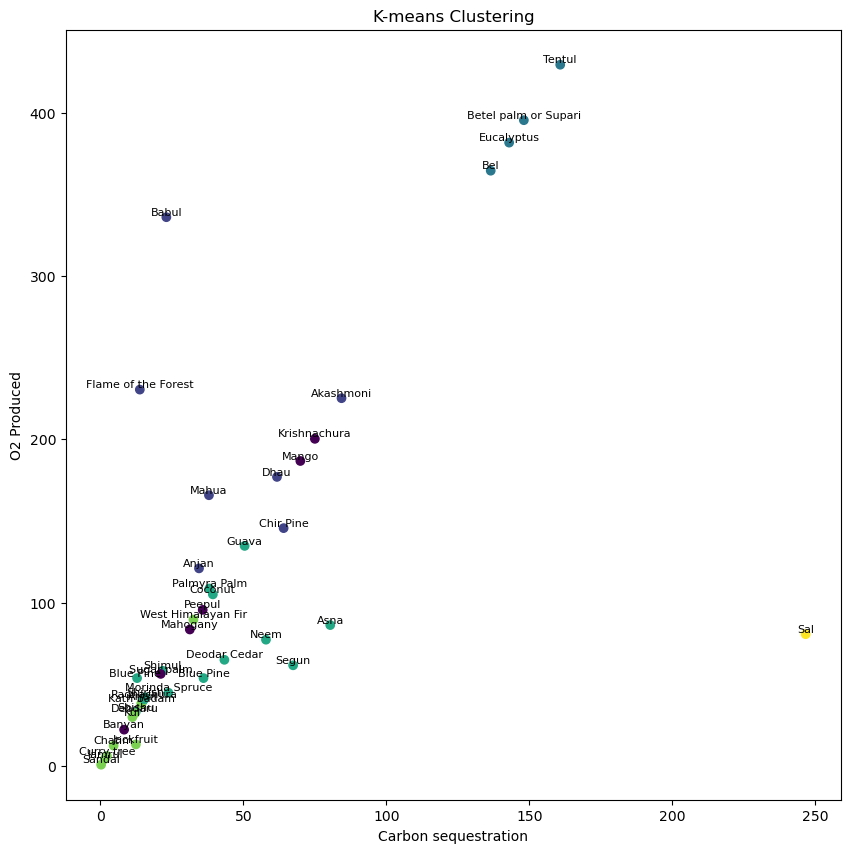

In [26]:
from sklearn.cluster import KMeans

# Load data from CSV file
df = pd.read_csv("data2.csv")  # Replace "car_data.csv" with the actual filename

# Select the features for clustering
X = df[["Area","Temperature","Humidity","CS","O2"]]  # Features: Size, Weight, Speed

# Perform k-means clustering
k = 6  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

# Add cluster labels to the dataset
df["Cluster"] = kmeans.labels_

plt.figure(figsize=(10, 10))
# Visualize the clusters
plt.scatter(df["CS"], df["O2"], c=df["Cluster"], cmap="viridis")
plt.xlabel("Carbon sequestration")
plt.ylabel("O2 Produced")
plt.title("K-means Clustering")

for i, row in df.iterrows():
    plt.text(row["CS"], row["O2"], row["Name"], fontsize=8, ha="center", va="bottom")

plt.show()


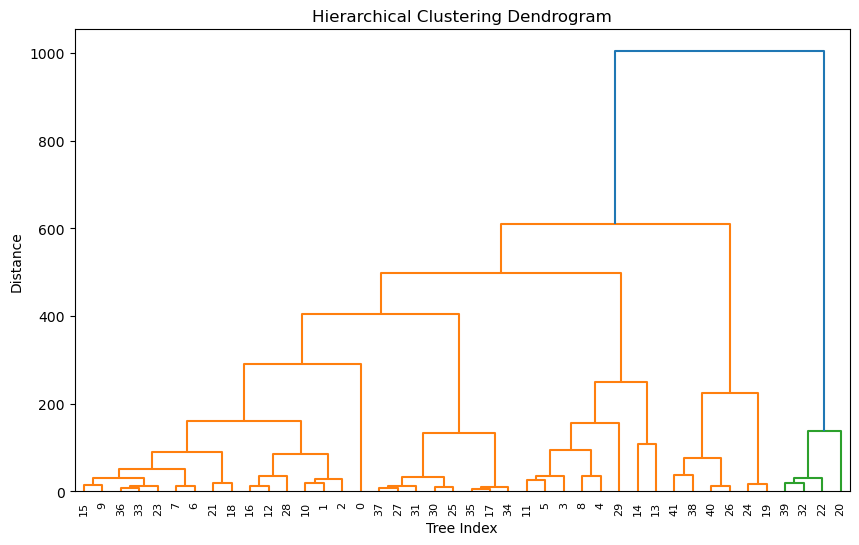

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Load data from CSV file
df = pd.read_csv("data2.csv")  

# Select the features for clustering
X = df[["Area","Temperature","Humidity","CS","O2"]]  

# Perform hierarchical clustering
linked = linkage(X, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Tree Index")
plt.ylabel("Distance")
plt.show()


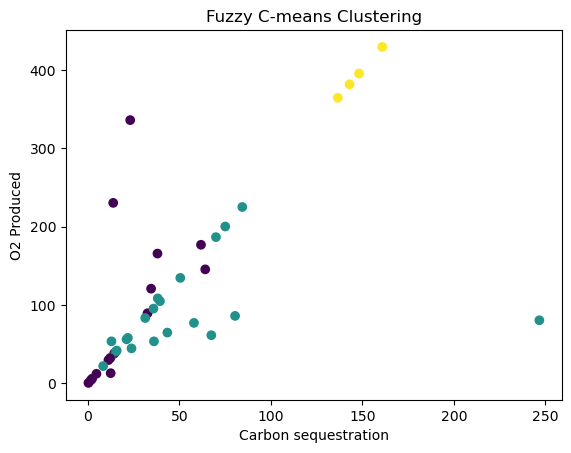

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import skfuzzy as fuzz

# Load data from CSV file
df = pd.read_csv("data2.csv") 
# Select the features for clustering
X = df[["Area","Temperature","Humidity","CS","O2"]] 

# Set the number of clusters
k = 3

# Perform fuzzy c-means clustering
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(X.T, k, 2, error=0.005, maxiter=1000)

# Get the cluster membership
cluster_membership = u.argmax(axis=0)

# Add cluster labels to the dataset
df["Cluster"] = cluster_membership

# Visualize the clusters
plt.scatter(df["CS"], df["O2"], c=df["Cluster"], cmap="viridis")
plt.xlabel("Carbon sequestration")
plt.ylabel("O2 Produced")
plt.title("Fuzzy C-means Clustering")
plt.show()


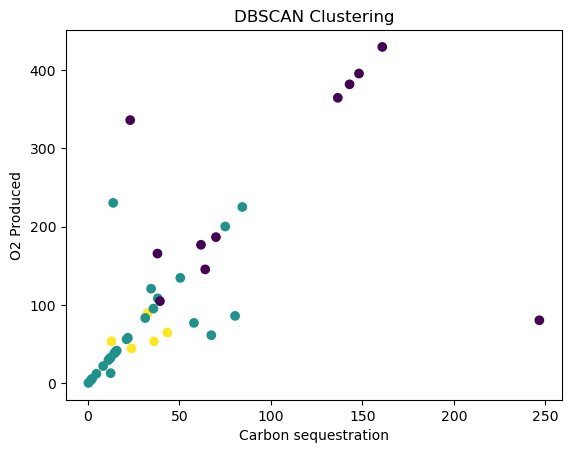

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Load data from CSV file
df = pd.read_csv("data2.csv")  

# Select the features for clustering
X = df[["Area","Temperature","Humidity","CS","O2"]]  

# Standardize the feature values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Set the DBSCAN parameters
eps = 1.2  # Epsilon (neighborhood distance)
min_samples = 4  # Minimum number of samples in a neighborhood

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan.fit(X_scaled)

# Get the cluster labels
cluster_labels = dbscan.labels_

# Add cluster labels to the dataset
df["Cluster"] = cluster_labels

# Visualize the clusters
plt.scatter(df["CS"], df["O2"], c=df["Cluster"], cmap="viridis")
plt.xlabel("Carbon sequestration")
plt.ylabel("O2 Produced")
plt.title("DBSCAN Clustering")
plt.show()